In [95]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import squarify
import yfinance as yf
import plotly
import plotly.express as px

import seaborn as sns

# Configurando los estilos de los gráficos
plt.ioff()
sns.set_context('talk')
sns.set_style("whitegrid")

# Configurando plotly orca
plotly.io.orca.config.executable = r'C:\anaconda3\orca_app\orca.exe'
plotly.io.orca.config.save()

## Data acquisition

In [96]:
excel_df = pd.read_excel('market_stock_value_scoring.xlsx', usecols=['Company','Symbol','Symbol_Yahoo','Description','MarketCap','MarketCap_USD','Currency','Country','Indices','Industries','Score_Long','Score_Short'])
excel_df.columns = ['Company','Symbol','Yahoo Symbol','Description','Country','Indices','Industries','Market Cap','Market Cap (USD)','Currency', 'Long Score','Short Score']
excel_df

,Company,Symbol,Yahoo Symbol,Description,Country,Indices,Industries,Market Cap,Market Cap (USD),Currency,Long Score,Short Score
0,3M Company,MMM,MMM.F,"3M Company develops, manufactures, and markets...",United States,"DOW JONES, S&P 100, S&P 500","Industrials, Industrial Conglomerates",88588066816,170.924903,17.507723,55.956284,1.024057e+11
1,A. O. Smith Corporation,AOS,AOS,A. O. Smith Corporation manufactures and marke...,United States,S&P 500,"Industrial Goods, Industrials, Machinery, Equi...",10306088960,73.809998,26.751354,53.333333,1.030609e+10
2,AMETEK Inc.,AME,AME,"AMETEK, Inc. manufactures and sells electronic...",United States,S&P 500,"Industrial Goods, Industrials, Machinery, Equi...",29139671040,139.885179,36.147236,63.278689,2.913967e+10
3,ANSYS Inc.,ANSS,ANSS,"ANSYS, Inc. develops and markets engineering s...",United States,"NASDAQ 100, S&P 500","Software, Technology, Software & IT Services",30125694976,413.190002,65.754234,67.759563,3.012569e+10
4,ASML Holding N.V.,ASML,ASML,"ASML Holding N.V. develops, produces, markets,...",Netherlands,"AEX, EURO STOXX 50, NASDAQ 100","Semiconductor Equipment & Testing, Technology,...",304167682048,895.929993,56.918940,70.163934,3.041677e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
300,Zebra Technologies Corporation,ZBRA,ZBRA,"Zebra Technologies Corporation, together with ...",United States,S&P 500,Computer hardware,26687690752,594.770020,41.801193,56.284153,2.668769e+10
301,adidas AG,ADS,ADS.F,"adidas AG, together with its subsidiaries, des...",Germany,"DAX, EURO STOXX 50","Cyclical Consumer Products, Footwear, Textiles...",51233796096,335.049988,53.342846,30.983607,5.922503e+10
302,eBay Inc.,EBAY,EBAY,eBay Inc. operates marketplace platforms that ...,United States,"NASDAQ 100, S&P 500","Technology, Software & IT Services, Internet S...",48786706432,77.720001,4.051063,69.726776,4.878671e+10
303,lululemon athletica inc.,LULU,LULU,"lululemon athletica inc., together with its su...",Canada,NASDAQ 100,Retail,53766905856,437.320007,73.709410,61.311475,5.376691e+10


## Data transformation

In [97]:
source_df = excel_df[['Symbol','Yahoo Symbol','Country','Indices','Industries','Market Cap','Market Cap (USD)']]
source_df

,Symbol,Yahoo Symbol,Country,Indices,Industries,Market Cap,Market Cap (USD)
0,MMM,MMM.F,United States,"DOW JONES, S&P 100, S&P 500","Industrials, Industrial Conglomerates",88588066816,170.924903
1,AOS,AOS,United States,S&P 500,"Industrial Goods, Industrials, Machinery, Equi...",10306088960,73.809998
2,AME,AME,United States,S&P 500,"Industrial Goods, Industrials, Machinery, Equi...",29139671040,139.885179
3,ANSS,ANSS,United States,"NASDAQ 100, S&P 500","Software, Technology, Software & IT Services",30125694976,413.190002
4,ASML,ASML,Netherlands,"AEX, EURO STOXX 50, NASDAQ 100","Semiconductor Equipment & Testing, Technology,...",304167682048,895.929993
...,...,...,...,...,...,...,...
300,ZBRA,ZBRA,United States,S&P 500,Computer hardware,26687690752,594.770020
301,ADS,ADS.F,Germany,"DAX, EURO STOXX 50","Cyclical Consumer Products, Footwear, Textiles...",51233796096,335.049988
302,EBAY,EBAY,United States,"NASDAQ 100, S&P 500","Technology, Software & IT Services, Internet S...",48786706432,77.720001
303,LULU,LULU,Canada,NASDAQ 100,Retail,53766905856,437.320007


## Data visualization

In [98]:
def get_color_palette(cmap, src):  
    norm = matplotlib.colors.Normalize(vmin=min(src), vmax=max(src))
    return [cmap(norm(value)) for value in src]    

### By Country

In [99]:
gb_country = source_df.groupby(by='Country')

In [100]:
# Defining sizes, labels and colors
countries = [key for (key,group) in gb_country]
stock_count = [len(group) for (key,group) in gb_country]
colors = get_color_palette(matplotlib.cm.RdYlGn,stock_count)

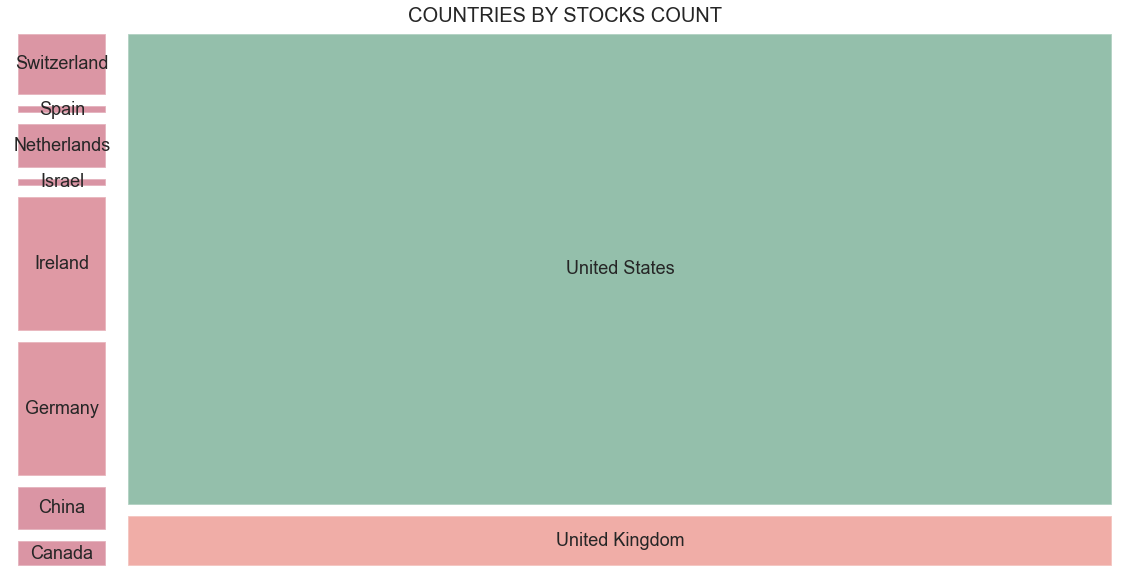

In [101]:
plt.subplots(figsize=(20,10))
squarify.plot(sizes=stock_count, label=countries, color=colors, pad=True, alpha=0.42)
plt.title(f'COUNTRIES BY STOCKS COUNT', size=20)
plt.axis('off')
plt.savefig(f"../images/COUNTRIES.png", bbox_inches='tight')
plt.show()

## By indice

In [102]:
indices = np.unique(', '.join(source_df['Indices']).split(', '))
indices

array(['AEX', 'DAX', 'DOW JONES', 'EURO STOXX 50', 'FTSE 100', 'IBEX 35',
       'NASDAQ 100', 'S&P 100', 'S&P 500', 'TECDAX'], dtype='<U13')

In [103]:
def plot_by_indice(indice):
    indice_df = excel_df[source_df['Indices'].str.contains(indice)].copy()
    indice_df.sort_values(by='Market Cap (USD)', inplace=True, ascending=False)
    colors = get_color_palette(matplotlib.cm.YlGn,indice_df['Market Cap (USD)'])

    plt.clf()
    plt.subplots(figsize=(20,10), )
    squarify.plot(sizes=indice_df['Market Cap (USD)'], label=indice_df['Yahoo Symbol'], color=colors, pad=True, alpha=0.8, text_kwargs={'color':'#000', 'size':16})
    plt.title(f'{indice} INDEX STOCKS', size=20)
    plt.axis('off')
    plt.savefig(f"../images/{indice}.png", bbox_inches='tight')
    plt.show()
    plt.close()

<Figure size 432x288 with 0 Axes>

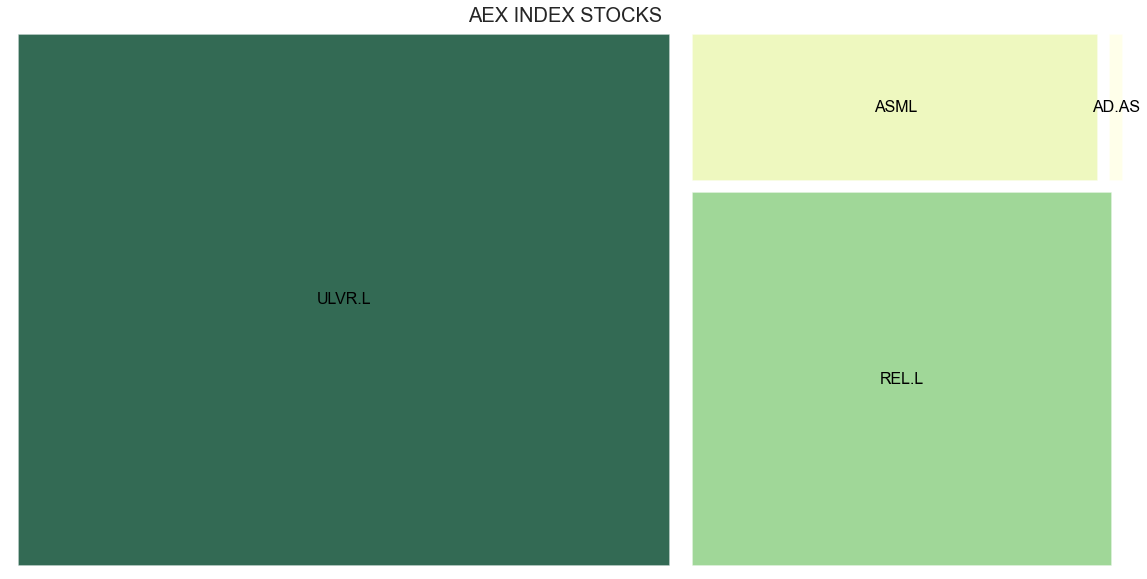

<Figure size 432x288 with 0 Axes>

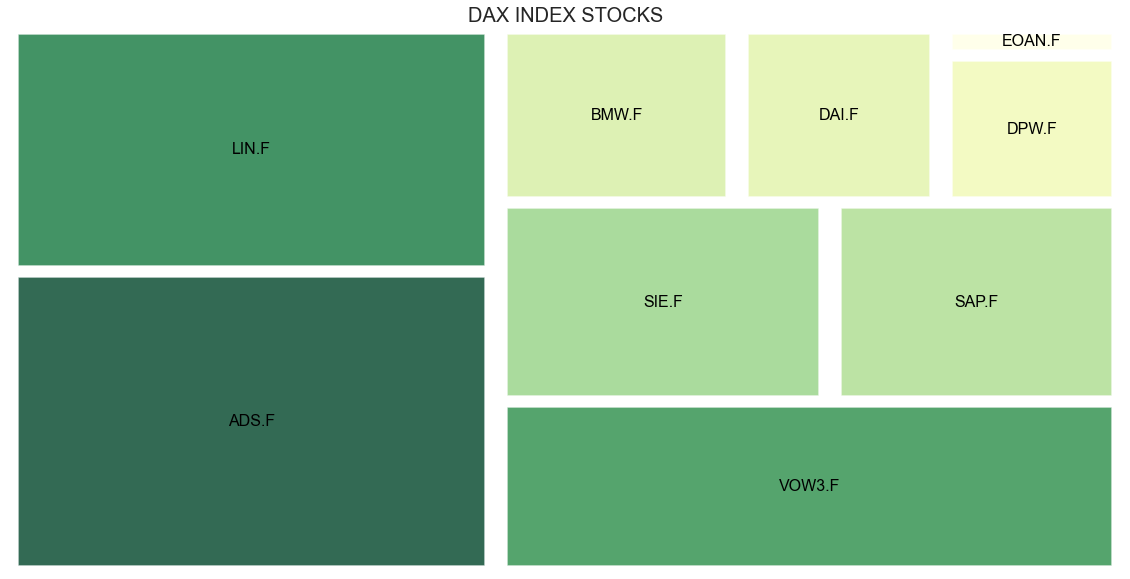

<Figure size 432x288 with 0 Axes>

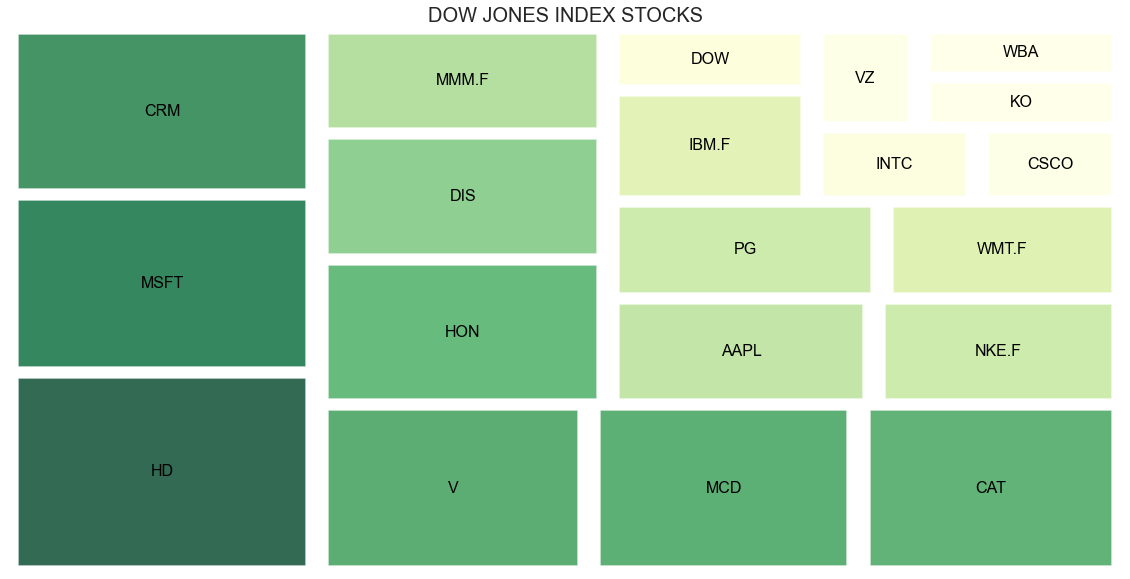

<Figure size 432x288 with 0 Axes>

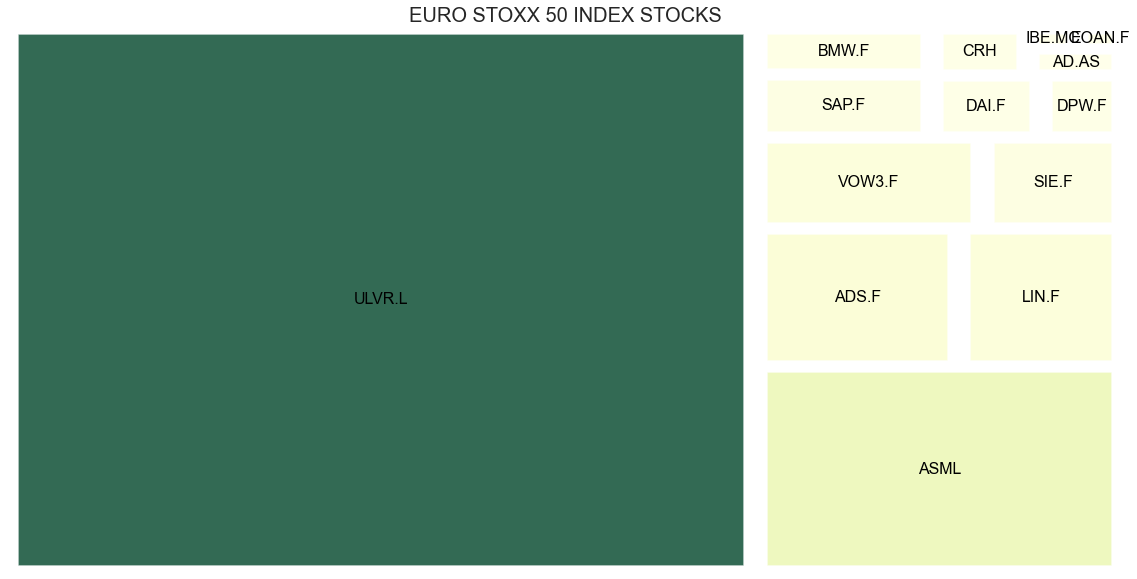

<Figure size 432x288 with 0 Axes>

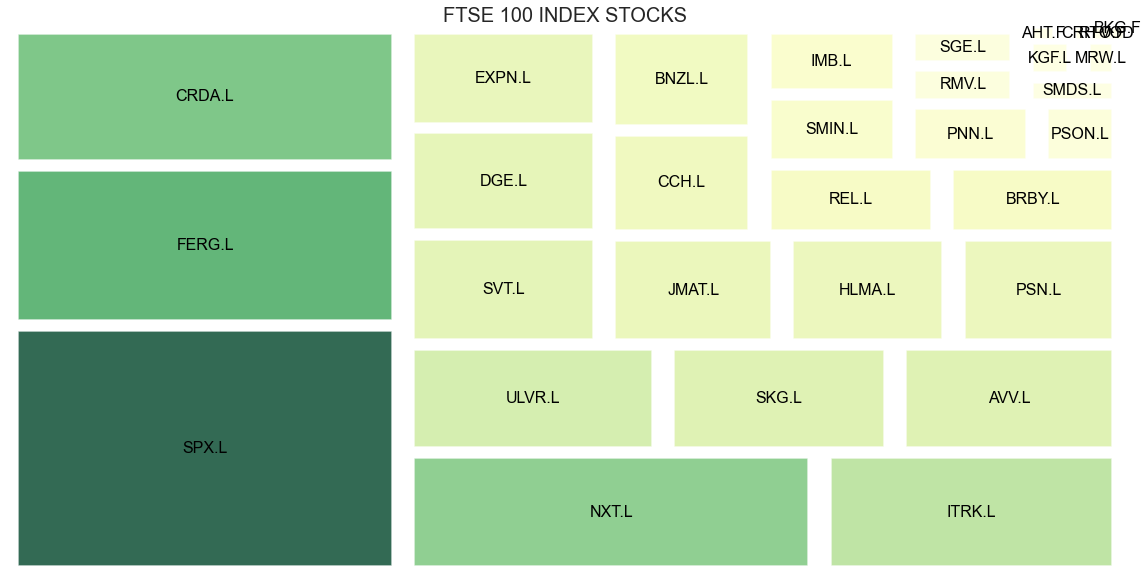

<Figure size 432x288 with 0 Axes>

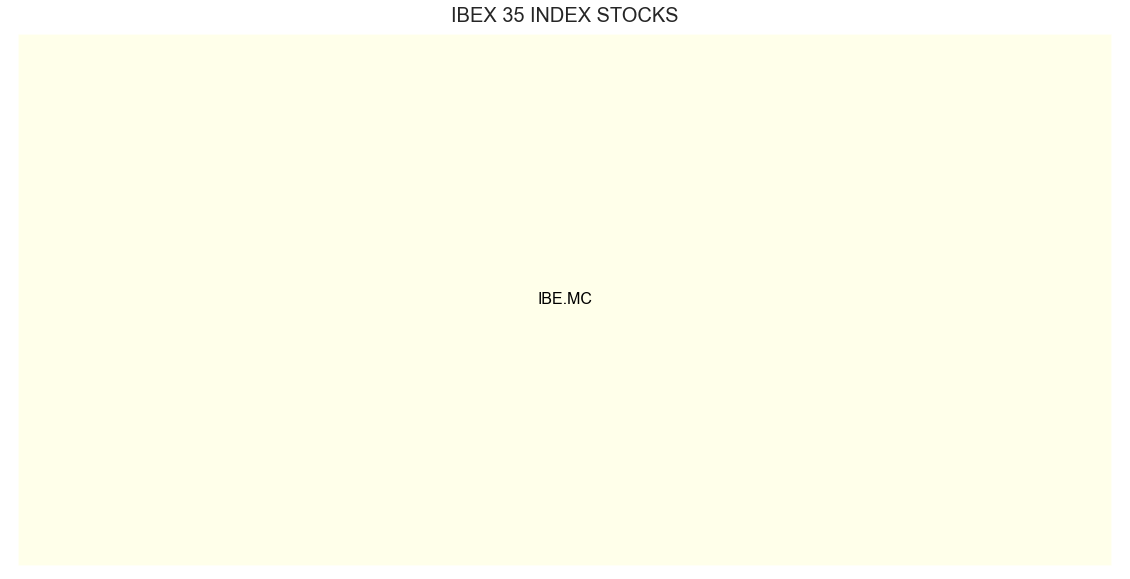

<Figure size 432x288 with 0 Axes>

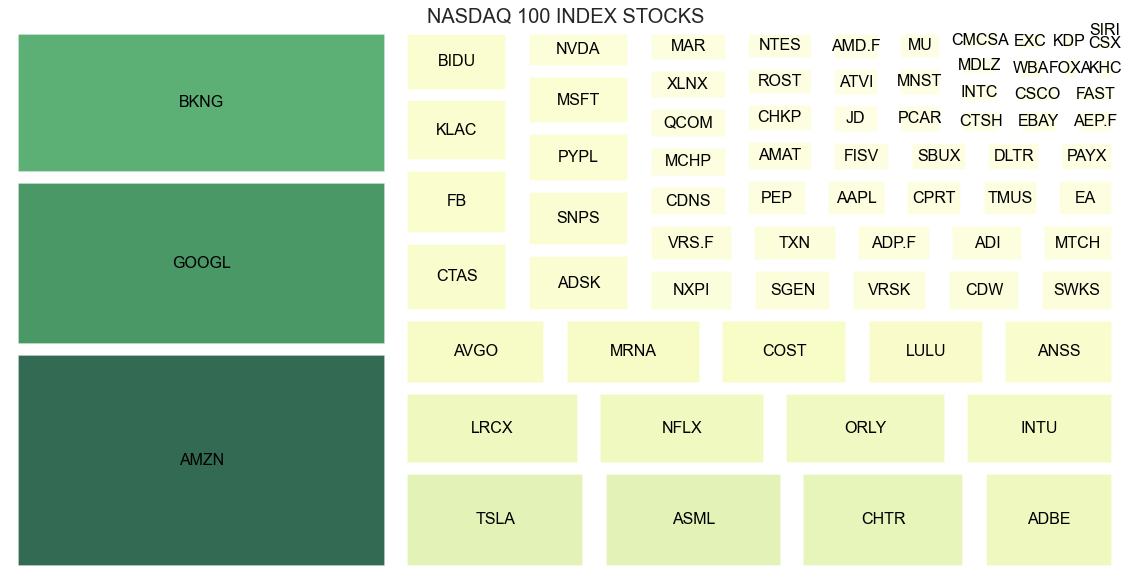

<Figure size 432x288 with 0 Axes>

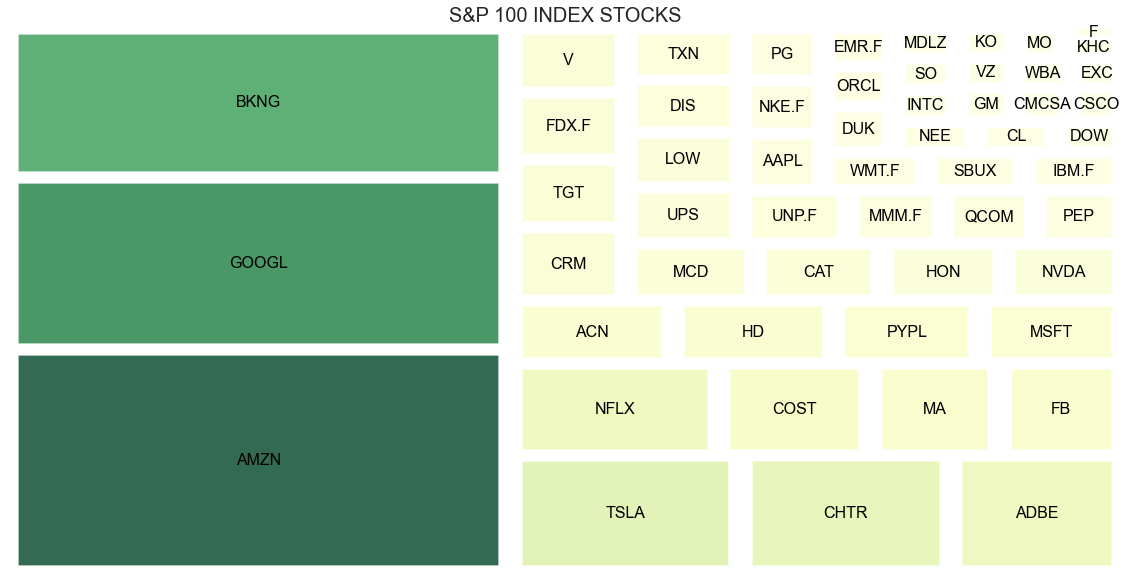

<Figure size 432x288 with 0 Axes>

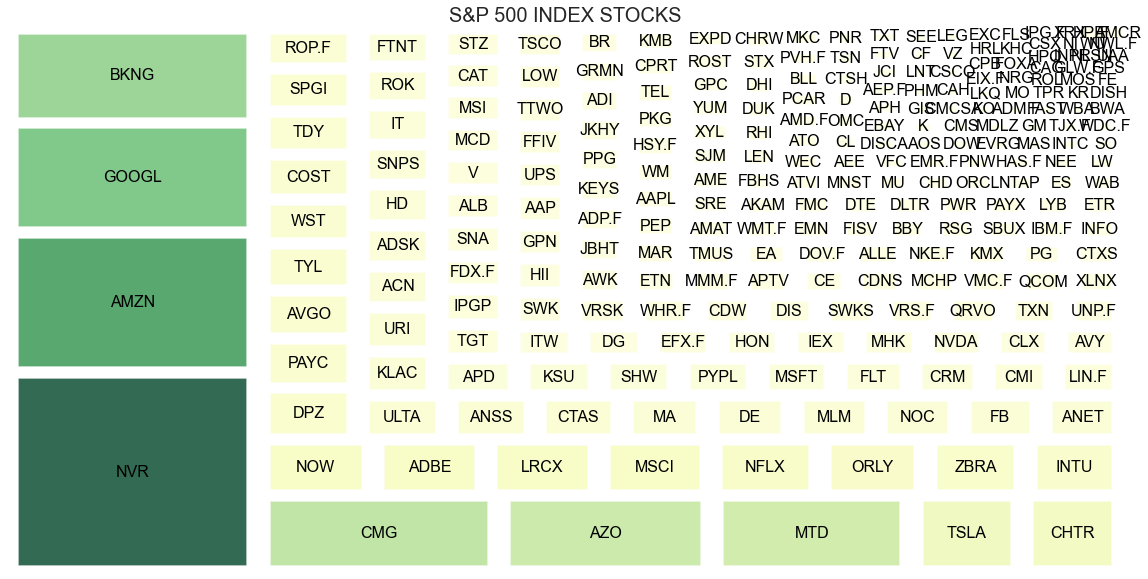

<Figure size 432x288 with 0 Axes>

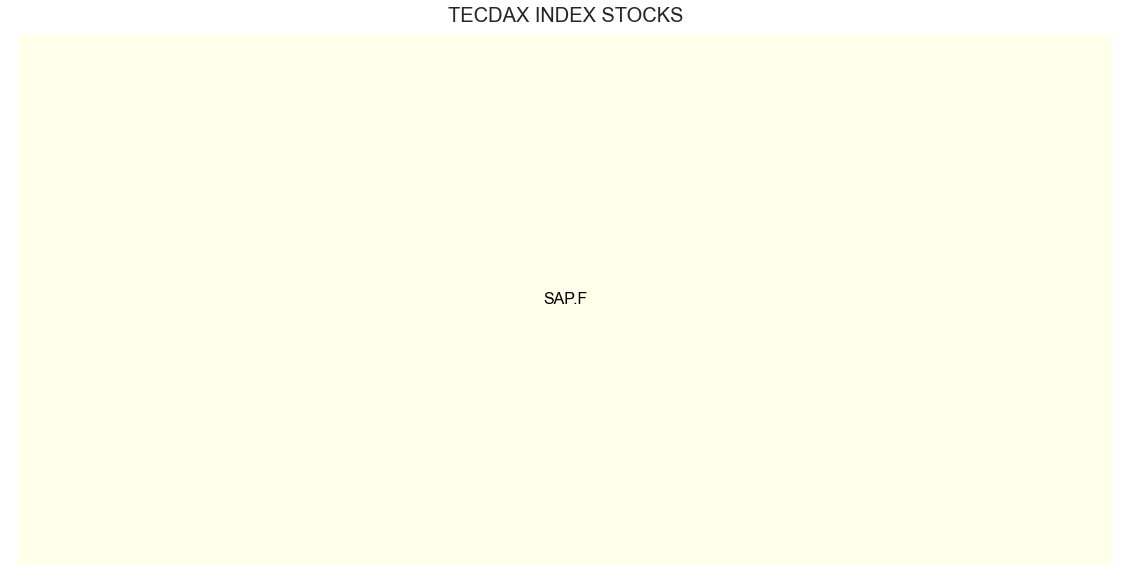

In [104]:
for indice in indices:
    plot_by_indice(indice)

## By industry

In [105]:
industries = np.unique(', '.join(source_df['Industries']).split(', '))
industries

array(['Advertising & Marketing', 'Aerospace & Defense',
       'Aerospace industry', 'Agricultural Chemicals',
       'Air Freight & Courier Services', 'Apparel & Accessories',
       'Apparel & Accessories Retailers', 'Appliances',
       'Applied Resources', 'Auto', 'Auto & Truck Manufacturers',
       'Auto Vehicles', 'Automobiles & Auto Parts', 'Automotive',
       'Automotive industry', 'Basic Materials', 'Beverage', 'Beverages',
       'Biotechnology', 'Broadcasting', 'Building materials',
       'Business Support Services', 'Chemicals', 'Commodity Chemicals',
       'Communications & Networking', 'Computer & Electronics Retailers',
       'Computer Hardware', 'Computer hardware', 'Computers',
       'Conglomerate', 'Construction & Engineering',
       'Construction Materials', 'Construction Supplies & Fixtures',
       'Consumer Cyclicals', 'Consumer Non-Cyclicals',
       'Consumer Publishing', 'Containers & Packaging',
       'Cyclical Consumer Products', 'Cyclical Consumer S

In [106]:
industries_to_plot = []

for industry in industries:
    industry_df = source_df[source_df['Industries'].str.contains(industry)].copy()
    industries_to_plot.append((industry,industry_df,len(industry_df)))

industries_to_plot = sorted(industries_to_plot, key=lambda x: x[2], reverse=True)

In [107]:
map_df = pd.DataFrame(columns=['Yahoo Symbol','Industry'])

for industry_to_plot in industries_to_plot:
    valid = True    

    for industry_to_compare in industries_to_plot:
        if (industry_to_plot[1] is industry_to_compare[1]):
            continue

        valid = not all(elem in list(industry_to_compare[1]['Yahoo Symbol']) for elem in list(industry_to_plot[1]['Yahoo Symbol']))
        
        if(not valid):
            break

    if(valid):
        industry_to_plot[1]['Industry'] = industry_to_plot[0]
        map_df = map_df.append(industry_to_plot[1][['Yahoo Symbol','Industry']], ignore_index=True)

map_df = map_df[~map_df['Yahoo Symbol'].duplicated(keep='last')].reset_index(drop=True)
map_df = map_df.join(excel_df[['Company','Symbol','Yahoo Symbol','Description','Country','Currency','Market Cap','Market Cap (USD)','Long Score','Short Score']].set_index('Yahoo Symbol'), on='Yahoo Symbol')
map_df = map_df.sort_values(['Country', 'Market Cap (USD)'], ascending=[False, False])
map_df = map_df[['Industry','Company','Symbol','Yahoo Symbol','Description','Country','Currency','Market Cap','Market Cap (USD)','Long Score','Short Score']]

In [108]:
map_df.to_csv("../files/market_stock_treemap_plotting.csv", index=False, float_format='%f')

In [109]:
map_df['Industry'] = map_df['Industry'].str.upper()
fig = px.treemap(map_df, 
                 path=['Industry', 'Symbol'], 
                 hover_data=['Company','Yahoo Symbol','Country'],
                 values='Market Cap (USD)',
                 color='Market Cap (USD)',
                 title='STOCKS CATEGORIZED BY INDUSTRIES',
                 width=1280,
                 height=760)
fig.show()
fig.write_image("../images/INDUSTRIES.png")